In [1]:
#!g1.1
import sys
sys.path.append('../src')

In [10]:
#!g1.1
import importlib
import prepare_data
import train_lstm
import lstm_ae
import matplotlib.pyplot as plt
import numpy as np

importlib.reload(prepare_data)
importlib.reload(train_lstm)
importlib.reload(lstm_ae)

<module 'lstm_ae' from '/home/jupyter/work/resources/diplom/notebooks/../src/lstm_ae.py'>

In [3]:
#!g1.1
PATH_TO_DATA = '/home/jupyter/datasphere/project/data/data_2023_03_[_200000].csv.gz'
COLS = ['Давление в системе','Уровень масла в баке',
       'Температура масла в баке']
       #'Статус загрязнения фильтров']
SEQ_LEN = 10
data = prepare_data.Data(PATH_TO_DATA, COLS, SEQ_LEN)

In [4]:
#!g1.1
df = data.read_dataset()
df.head()

,Давление в системе,Уровень масла в баке,Температура масла в баке
0,284.72223,60.937500,55.963547
1,284.72223,60.937500,55.963550
2,284.72223,60.937500,55.963550
3,284.77432,60.950520,55.963550
4,284.78010,60.951965,55.963550


In [5]:
#!g1.1
train_data, test_data, scaler = data.train_test_split(0.2)

In [11]:
from lstm_ae import LSTM_AE
from train_lstm import train

model, train_losses, val_losses = train(
    LSTM_AE, train_data, test_data, encoding_dim=8, epochs=10, 
    h_dims=[64, 32], verbose=True, h_activ=None
)

Epoch: 1, Train loss: 9.371491432189941, Valid loss: 0.01826344057917595
Epoch: 2, Train loss: 4.1548237800598145, Valid loss: 0.02150648832321167
Epoch: 3, Train loss: 2.711019992828369, Valid loss: 0.02450479008257389
Epoch: 4, Train loss: 2.1470510959625244, Valid loss: 0.014830125495791435
Epoch: 5, Train loss: 2.072218179702759, Valid loss: 0.015148118138313293
Epoch: 6, Train loss: 2.066091775894165, Valid loss: 0.01793316751718521
Epoch: 7, Train loss: 1.9871875047683716, Valid loss: 0.017108039930462837
Epoch: 8, Train loss: 1.8020515441894531, Valid loss: 0.015668990090489388
Epoch: 9, Train loss: 1.7650368213653564, Valid loss: 0.014569715596735477
Epoch: 10, Train loss: 1.584039330482483, Valid loss: 0.017424896359443665


In [15]:
pred_test = train_lstm.get_preds(model, test_data)

In [28]:
true_vals = np.array([t.detach().numpy()[0] for t in test_data])

pred_vals = np.array([t.detach().numpy()[0] for t in pred_test])

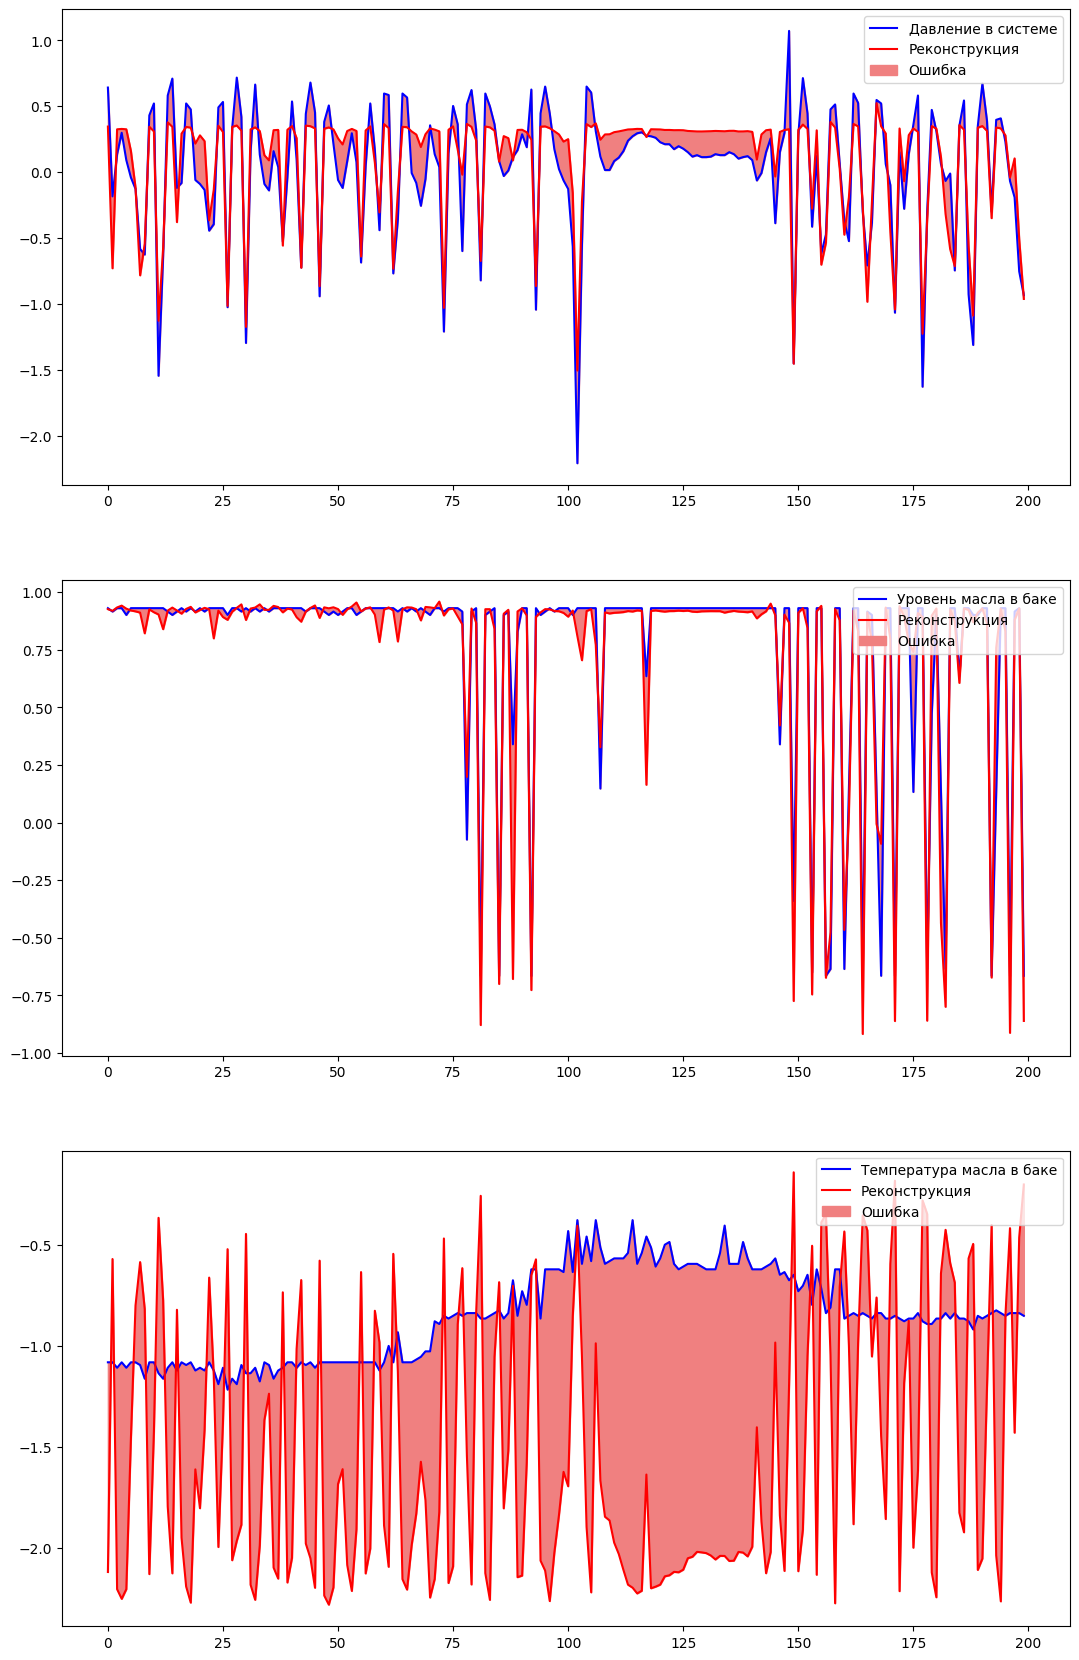

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(13, 3 * 7))

for i in range(3):
    ax[i].plot(true_vals[500:700, i], 'b')
    ax[i].plot(pred_vals[500:700, i], 'r')
    ax[i].fill_between(np.arange(len(true_vals[500:700, i])), pred_vals[500:700, i], true_vals[500:700, i], color='lightcoral')
    if i == 0:
        feature = 'Давление в системе' 
    elif i == 1:
        feature = 'Уровень масла в баке'
    else:
        feature = 'Температура масла в баке'
    ax[i].legend(labels=[feature, "Реконструкция", "Ошибка"], loc="upper right")
plt.show()